In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/liver/NFRP_10_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00135.00135.3,1,LRSDLDEKETER/3,0.185,0.000638,[2],0,0.324,68,0.0634,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q69YQ0|CYTSA_HUMAN(pre=K,post=S)",163016229
1,Adult_Liver_bRP_Elite_82_f01.00146.00146.2,1,ELISVVIAVK/2,0.178,0.010000,[2],0,-0.005,31,0.0730,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q86VP3|PACS2_HUMAN(pre=K,post=M)",54458471
2,Adult_Liver_bRP_Elite_82_f01.00187.00187.2,1,FYLEVSQILK/2,0.205,0.027000,[2],0,0.507,75,0.0750,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q06278|AOXA_HUMAN(pre=K,post=K)",75901604
3,Adult_Liver_bRP_Elite_82_f01.00337.00337.2,1,IVGGWDLLPR/2,0.190,0.011000,[2],0,0.506,52,0.0530,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96RQ9|OXLA_HUMAN(pre=R,post=A)",119810454
4,Adult_Liver_bRP_Elite_82_f01.00339.00339.2,1,LEVIIEESYDFK/2,0.207,0.041000,[2],0,-0.010,94,0.0570,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9UPR5|NAC2_HUMAN(pre=R,post=N)",145609691


In [3]:
NNd1 = pd.read_excel('./target_decoy/liver/NFRP_10_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00156.00156.2,1,TGGSTVLVVRK/2,0.138,0.010,[2],0,0.000,47,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9HAB8|PPCS_HUMAN(pre=R,post=V)",634685373
1,Adult_Liver_bRP_Elite_82_f01.00157.00157.2,1,EELEKHQAELNK/2,0.206,0.010,[2],0,0.494,89,0.062,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q16181|SEPT7_HUMAN(pre=K,post=R)",578930084
2,Adult_Liver_bRP_Elite_82_f01.00171.00171.2,1,EFVSEQAQALMMK/2,0.185,0.002,[2],0,-0.005,53,0.054,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IUC4|RHPN2_HUMAN(pre=K,post=I)",566374731
3,Adult_Liver_bRP_Elite_82_f01.00177.00177.2,1,FVTSFVVTVK/2,0.178,0.028,[2],0,0.001,55,0.064,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O15144|ARPC2_HUMAN(pre=R,post=D)",727815134
4,Adult_Liver_bRP_Elite_82_f01.00178.00178.3,1,SNASEYMDGEVKR/3,0.112,0.004,[2],0,-0.003,15,0.058,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q92793|CBP_HUMAN(pre=K,post=D)",510211031


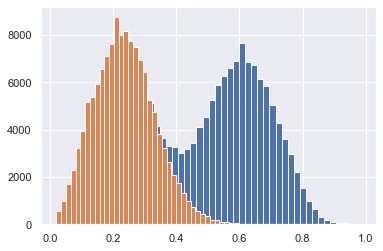

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.019260000000000003
0.015159999999999996


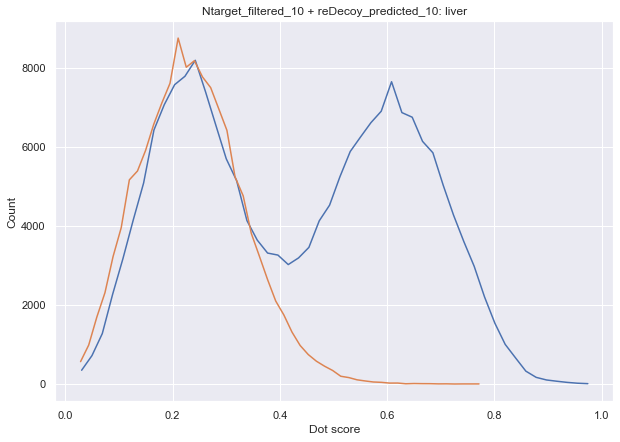

In [6]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('Ntarget_filtered_10 + reDecoy_predicted_10: liver')
plt.plot(nnt1[1][:-1] + 0.0095, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0075, nnd1[0])
plt.show()

In [7]:
# liver
print(len(NNt1))
print(len(NNd1))

197556
132663


In [8]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.5000000000000003
nnt:  86624
nnd:  852
FDR:  0.009835611377909125
"""

score:  0.001
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.002
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.003
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.004
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.005
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.006
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.007
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.008
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.009000000000000001
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.010000000000000002
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.011000000000000003
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.012000000000000004
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.013000000000000005
nnt:  197556
nnd:  132663
FDR:  0.6715209864544737


score:  0.014000000000000005
nnt:  197556
nnd:  132663

nnt:  192048
nnd:  121891
FDR:  0.6346902857618929


score:  0.10500000000000008
nnt:  191903
nnd:  121614
FDR:  0.6337264138653382


score:  0.10600000000000008
nnt:  191731
nnd:  121359
FDR:  0.6329649352478212


score:  0.10700000000000008
nnt:  191553
nnd:  121072
FDR:  0.6320548359983921


score:  0.10800000000000008
nnt:  191382
nnd:  120794
FDR:  0.6311669854009259


score:  0.10900000000000008
nnt:  191203
nnd:  120487
FDR:  0.630152246565169


score:  0.11000000000000008
nnt:  191051
nnd:  120220
FDR:  0.6292560625173383


score:  0.11100000000000008
nnt:  190883
nnd:  119934
FDR:  0.6283115835354641


score:  0.11200000000000009
nnt:  190704
nnd:  119635
FDR:  0.6273334591828174


score:  0.11300000000000009
nnt:  190533
nnd:  119356
FDR:  0.6264321666063096


score:  0.11400000000000009
nnt:  190363
nnd:  119058
FDR:  0.62542615949528


score:  0.11500000000000009
nnt:  190188
nnd:  118744
FDR:  0.624350642522136


score:  0.11600000000000009
nnt:  189975
nnd:  118438
FDR:  

nnt:  161538
nnd:  78807
FDR:  0.48785425101214575


score:  0.20900000000000016
nnt:  161125
nnd:  78253
FDR:  0.48566640806827


score:  0.21000000000000016
nnt:  160741
nnd:  77735
FDR:  0.4836040587031311


score:  0.21100000000000016
nnt:  160335
nnd:  77157
FDR:  0.48122368790345216


score:  0.21200000000000016
nnt:  159904
nnd:  76636
FDR:  0.47926255753452074


score:  0.21300000000000016
nnt:  159487
nnd:  76101
FDR:  0.4771611479305523


score:  0.21400000000000016
nnt:  159081
nnd:  75610
FDR:  0.4752924610732897


score:  0.21500000000000016
nnt:  158675
nnd:  75080
FDR:  0.47316842602804476


score:  0.21600000000000016
nnt:  158237
nnd:  74547
FDR:  0.471109791009688


score:  0.21700000000000016
nnt:  157830
nnd:  73987
FDR:  0.468776531711335


score:  0.21800000000000017
nnt:  157425
nnd:  73451
FDR:  0.46657773542956965


score:  0.21900000000000017
nnt:  157000
nnd:  72925
FDR:  0.4644904458598726


score:  0.22000000000000017
nnt:  156591
nnd:  72420
FDR:  0.462478

nnt:  123327
nnd:  27928
FDR:  0.2264548720069409


score:  0.3120000000000002
nnt:  123047
nnd:  27569
FDR:  0.22405259778783718


score:  0.3130000000000002
nnt:  122776
nnd:  27204
FDR:  0.2215742490389001


score:  0.3140000000000002
nnt:  122539
nnd:  26845
FDR:  0.2190731114175895


score:  0.3150000000000002
nnt:  122272
nnd:  26495
FDR:  0.2166890211986391


score:  0.3160000000000002
nnt:  121992
nnd:  26137
FDR:  0.21425175421339104


score:  0.3170000000000002
nnt:  121742
nnd:  25800
FDR:  0.21192357608713508


score:  0.3180000000000002
nnt:  121465
nnd:  25434
FDR:  0.20939365249248754


score:  0.31900000000000023
nnt:  121204
nnd:  25064
FDR:  0.20679185505428863


score:  0.32000000000000023
nnt:  120936
nnd:  24701
FDR:  0.20424852814711913


score:  0.32100000000000023
nnt:  120687
nnd:  24362
FDR:  0.20186101237084358


score:  0.32200000000000023
nnt:  120406
nnd:  24017
FDR:  0.1994668039798681


score:  0.32300000000000023
nnt:  120178
nnd:  23711
FDR:  0.1972990

nnt:  102835
nnd:  5023
FDR:  0.04884523751640978


score:  0.4170000000000003
nnt:  102683
nnd:  4935
FDR:  0.04806053582384621


score:  0.4180000000000003
nnt:  102533
nnd:  4838
FDR:  0.04718480879326656


score:  0.4190000000000003
nnt:  102359
nnd:  4758
FDR:  0.046483455289715606


score:  0.4200000000000003
nnt:  102205
nnd:  4652
FDR:  0.04551636417005039


score:  0.4210000000000003
nnt:  102035
nnd:  4552
FDR:  0.04461214289214485


score:  0.4220000000000003
nnt:  101870
nnd:  4464
FDR:  0.043820555610091294


score:  0.4230000000000003
nnt:  101723
nnd:  4372
FDR:  0.04297946383807005


score:  0.4240000000000003
nnt:  101577
nnd:  4293
FDR:  0.0422635045335066


score:  0.4250000000000003
nnt:  101403
nnd:  4200
FDR:  0.04141889293216177


score:  0.4260000000000003
nnt:  101241
nnd:  4108
FDR:  0.04057644630139963


score:  0.4270000000000003
nnt:  101103
nnd:  4033
FDR:  0.039890013154901434


score:  0.4280000000000003
nnt:  100932
nnd:  3966
FDR:  0.039293781952205446

'\n결과\nscore:  0.5270000000000004\nnnt:  183927\nnnd:  1805\nFDR:  0.00981367607800921\n'

In [9]:
NNt2 = pd.read_excel('./target_decoy/HEK/NFRP_10_target.xlsx')
NNt2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,84,0.0949,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q04695|K1C17_HUMAN(pre=R,post=R)",165241497
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0210,[2],0,0.334,35,0.0670,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9H773|DCTP1_HUMAN(pre=R,post=S)",219973830
2,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.1990,[2],0,-0.002,85,0.0930,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",217882846
3,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.2430,[2],0,-0.003,19,0.1080,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P12277|KCRB_HUMAN(pre=R,post=T)",97722616
4,b1906_293T_proteinID_01A_QE3_122212.01910.01910.4,1,HGGYKPSDEHK/4,0.611,0.4520,[2],0,-0.002,4,0.2180,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P12277|KCRB_HUMAN(pre=R,post=T)",97723686


In [10]:
NNd2 = pd.read_excel('./target_decoy/HEK/NFRP_10_decoy.xlsx')
NNd2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,HSGPFQR/2,0.231,0.089,[2],0,0.004,30,0.064,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q15006|EMC2_HUMAN(pre=R,post=V)",603317893
1,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.168,0.043,[2],0,-0.002,5,0.103,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9NSY1|BMP2K_HUMAN(pre=K,post=G)",713038596
2,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PWDDLDLSR/2,0.184,0.022,[2],0,0.495,48,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q99490|AGAP2_HUMAN(pre=R,post=E)",650549728
3,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PERGTSLAHLEMR/4,0.381,0.182,[2],0,0.003,12,0.098,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P40306|PSB10_HUMAN(pre=K,post=V)",562263188
4,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,EERLNETDIHLK/3,0.277,0.074,[2],0,0.001,97,0.074,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q14BN4|SLMAP_HUMAN(pre=R,post=D)",527759295


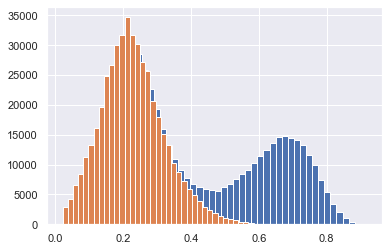

In [11]:
nnt2 = plt.hist(NNt2['Dot'], bins = 50)
nnd2 = plt.hist(NNd2['Dot'], bins = 50)

0.01796
0.01524


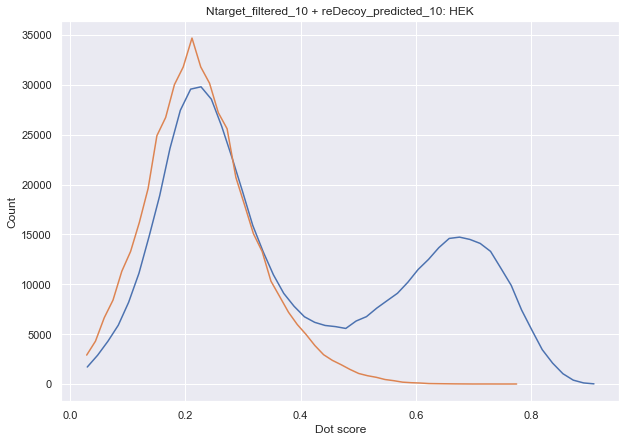

In [12]:
print(nnt2[1][1] - nnt2[1][0])
print(nnd2[1][1] - nnd2[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('Ntarget_filtered_10 + reDecoy_predicted_10: HEK')
plt.plot(nnt2[1][:-1] + 0.0085, nnt2[0])
plt.plot(nnd2[1][:-1] + 0.0075, nnd2[0])
plt.show()

In [13]:
# HEK
print(len(NNt2))
print(len(NNd2))

560465
466141


In [14]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt2['Dot'] >= score
    nnt = NNt2[nntarget]
    
    nndecoy = NNd2['Dot'] >= score
    nnd = NNd2[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.5270000000000004
nnt:  183927
nnd:  1805
FDR:  0.00981367607800921
"""

score:  0.001
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.002
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.003
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.004
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.005
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.006
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.007
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.008
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.009000000000000001
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.010000000000000002
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.011000000000000003
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.012000000000000004
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.013000000000000005
nnt:  560465
nnd:  466141
FDR:  0.8317040314738654


score:  0.014000000000000005
nnt:  560465
nnd:  466141

nnt:  540962
nnd:  427611
FDR:  0.790464025199552


score:  0.10400000000000008
nnt:  540520
nnd:  426747
FDR:  0.7895119514541552


score:  0.10500000000000008
nnt:  540029
nnd:  425874
FDR:  0.7886132041057055


score:  0.10600000000000008
nnt:  539528
nnd:  425001
FDR:  0.7877274210050266


score:  0.10700000000000008
nnt:  539034
nnd:  424103
FDR:  0.7867833939974102


score:  0.10800000000000008
nnt:  538516
nnd:  423163
FDR:  0.7857946653395628


score:  0.10900000000000008
nnt:  538002
nnd:  422260
FDR:  0.7848669707547555


score:  0.11000000000000008
nnt:  537501
nnd:  421293
FDR:  0.7837994720009823


score:  0.11100000000000008
nnt:  537010
nnd:  420289
FDR:  0.7826465056516638


score:  0.11200000000000009
nnt:  536495
nnd:  419310
FDR:  0.78157298763269


score:  0.11300000000000009
nnt:  535945
nnd:  418342
FDR:  0.7805689016596852


score:  0.11400000000000009
nnt:  535405
nnd:  417309
FDR:  0.7794267890662209


score:  0.11500000000000009
nnt:  534818
nnd:  416309
FDR: 

nnt:  433519
nnd:  265790
FDR:  0.6130988491853875


score:  0.20600000000000016
nnt:  431921
nnd:  263590
FDR:  0.610273638003246


score:  0.20700000000000016
nnt:  430237
nnd:  261398
FDR:  0.6075674570062547


score:  0.20800000000000016
nnt:  428625
nnd:  259241
FDR:  0.6048200641586469


score:  0.20900000000000016
nnt:  426947
nnd:  257062
FDR:  0.6020934682759218


score:  0.21000000000000016
nnt:  425292
nnd:  254856
FDR:  0.5992494568437685


score:  0.21100000000000016
nnt:  423621
nnd:  252646
FDR:  0.5963963070763725


score:  0.21200000000000016
nnt:  421928
nnd:  250508
FDR:  0.5937221516467265


score:  0.21300000000000016
nnt:  420244
nnd:  248320
FDR:  0.5908948134893062


score:  0.21400000000000016
nnt:  418622
nnd:  246139
FDR:  0.5879743539517751


score:  0.21500000000000016
nnt:  416936
nnd:  243985
FDR:  0.5851857359402882


score:  0.21600000000000016
nnt:  415328
nnd:  241809
FDR:  0.5822121311349102


score:  0.21700000000000016
nnt:  413725
nnd:  239663
FDR

nnt:  286752
nnd:  85346
FDR:  0.2976300078116282


score:  0.3080000000000002
nnt:  285759
nnd:  84245
FDR:  0.2948113620218436


score:  0.3090000000000002
nnt:  284784
nnd:  83057
FDR:  0.29164910950053374


score:  0.3100000000000002
nnt:  283864
nnd:  81999
FDR:  0.28886720401318944


score:  0.3110000000000002
nnt:  282846
nnd:  80902
FDR:  0.2860284395041825


score:  0.3120000000000002
nnt:  281968
nnd:  79818
FDR:  0.2830746751404415


score:  0.3130000000000002
nnt:  280990
nnd:  78787
FDR:  0.2803907612370547


score:  0.3140000000000002
nnt:  280092
nnd:  77694
FDR:  0.27738742984447967


score:  0.3150000000000002
nnt:  279188
nnd:  76664
FDR:  0.2745963293551299


score:  0.3160000000000002
nnt:  278323
nnd:  75642
FDR:  0.2717777546232255


score:  0.3170000000000002
nnt:  277441
nnd:  74602
FDR:  0.26889320612310363


score:  0.3180000000000002
nnt:  276597
nnd:  73594
FDR:  0.26606940783884137


score:  0.31900000000000023
nnt:  275726
nnd:  72591
FDR:  0.2632722340294

nnt:  224095
nnd:  18508
FDR:  0.08258997300252126


score:  0.4110000000000003
nnt:  223725
nnd:  18212
FDR:  0.08140350877192983


score:  0.4120000000000003
nnt:  223384
nnd:  17925
FDR:  0.08024298965010923


score:  0.4130000000000003
nnt:  223012
nnd:  17621
FDR:  0.07901368536222265


score:  0.4140000000000003
nnt:  222638
nnd:  17320
FDR:  0.0777944465904293


score:  0.4150000000000003
nnt:  222298
nnd:  17024
FDR:  0.07658188557701824


score:  0.4160000000000003
nnt:  221977
nnd:  16742
FDR:  0.07542222842907148


score:  0.4170000000000003
nnt:  221649
nnd:  16449
FDR:  0.07421192967259045


score:  0.4180000000000003
nnt:  221323
nnd:  16139
FDR:  0.07292057309904529


score:  0.4190000000000003
nnt:  220950
nnd:  15897
FDR:  0.07194840461642905


score:  0.4200000000000003
nnt:  220586
nnd:  15622
FDR:  0.07082045098056994


score:  0.4210000000000003
nnt:  220238
nnd:  15353
FDR:  0.06971094906419419


score:  0.4220000000000003
nnt:  219893
nnd:  15084
FDR:  0.06859699

nnt:  188942
nnd:  2456
FDR:  0.012998698013146891


score:  0.5150000000000003
nnt:  188550
nnd:  2395
FDR:  0.012702201007690268


score:  0.5160000000000003
nnt:  188186
nnd:  2350
FDR:  0.012487645202087297


score:  0.5170000000000003
nnt:  187810
nnd:  2306
FDR:  0.012278366434162186


score:  0.5180000000000003
nnt:  187442
nnd:  2248
FDR:  0.011993043181357433


score:  0.5190000000000003
nnt:  187070
nnd:  2191
FDR:  0.01171219329662693


score:  0.5200000000000004
nnt:  186673
nnd:  2136
FDR:  0.0114424689162332


score:  0.5210000000000004
nnt:  186293
nnd:  2078
FDR:  0.011154471719280917


score:  0.5220000000000004
nnt:  185913
nnd:  2026
FDR:  0.010897570368936007


score:  0.5230000000000004
nnt:  185531
nnd:  1992
FDR:  0.010736750192690171


score:  0.5240000000000004
nnt:  185125
nnd:  1932
FDR:  0.010436191762322754


score:  0.5250000000000004
nnt:  184755
nnd:  1891
FDR:  0.010235176314578766


score:  0.5260000000000004
nnt:  184324
nnd:  1847
FDR:  0.01002039886

'\n결과\nscore:  0.5250000000000004\nnnt:  184722\nnnd:  1832\nFDR:  0.009917605915916892\n'

In [16]:
NNt1_1 = pd.read_excel('./target_decoy/lung/NFRP_10_1_target.xlsx')
NNt1_1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00038.00038.2,1,QPVQVPVTLVR/2,0.138,0.024,[2],0,0.491,13,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q06330|SUH_HUMAN(pre=R,post=N)",204920327
1,01088_A01_P010740_S00_N01_R1.00107.00107.2,1,YLHPPTHLK/2,0.321,0.052,[2],0,-0.007,83,0.071,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q5VZF2|MBNL2_HUMAN(pre=K,post=T)",290371865
2,01088_A01_P010740_S00_N01_R1.00177.00177.2,1,GVDLTEPTQPTR/2,0.182,0.011,[2],0,0.500,61,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P20339|RAB5A_HUMAN(pre=R,post=N)",93428351
3,01088_A01_P010740_S00_N01_R1.00178.00178.2,1,LSYSTSQEFSSR/2,0.123,0.019,[2],0,0.494,48,0.046,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q5VUB5|F1711_HUMAN(pre=K,post=E)",165457653
4,01088_A01_P010740_S00_N01_R1.00185.00185.2,1,DLEINAEEEPEK/2,0.152,0.022,[2],0,-0.005,32,0.062,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q12955|ANK3_HUMAN(pre=R,post=K)",32499467


In [17]:
NNt1_2 = pd.read_excel('./target_decoy/lung/NFRP_10_2_target.xlsx')
NNt1_2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_E04_P010740_S00_N29_R1.51102.51102.3,1,NNNIDMEVERPSNSEAHETDTAISYK/3,0.163,0.042,[2],0,0.330,7,0.079,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q53SF7|COBL1_HUMAN(pre=K,post=E)",184092642
1,01088_E04_P010740_S00_N29_R1.51103.51103.3,1,APARPAPDAPEDTGDSDEWVFDKK/3,0.084,0.004,[2],0,-0.008,4,0.067,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q14896|MYPC3_HUMAN(pre=K,post=L)",15329074
2,01088_E04_P010740_S00_N29_R1.51105.51105.2,1,GQFAEHLLGAGFVSSR/2,0.139,0.017,[2],0,-0.001,62,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9H2U1|DHX36_HUMAN(pre=K,post=N)",89299859
3,01088_E04_P010740_S00_N29_R1.51106.51106.3,1,NVNIYRDSAIPVESDTDDEGAPR/3,0.111,0.016,[2],0,-0.004,13,0.055,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96D46|NMD3_HUMAN(pre=K,post=I)",188431538
4,01088_E04_P010740_S00_N29_R1.51114.51114.2,1,GWDSVQQSITMVR/2,0.301,0.039,[2],0,0.009,114,0.072,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q8IX19|MCEM1_HUMAN(pre=R,post=S)",94522160


In [18]:
NNt1_3 = pd.read_excel('./target_decoy/lung/NFRP_10_3_target.xlsx')
NNt1_3.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01279_C03_P013163_B00_N19_R1.26492.26492.4,1,IKSEHPGLSIGDTAK/4,0.251,0.101,[2],0,-0.009,12,0.101,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P26583|HMGB2_HUMAN(pre=K,post=K)",112186427
1,01279_C03_P013163_B00_N19_R1.26495.26495.3,1,IIYHLDGQETPYLVK/3,0.498,0.257,[2],0,0.001,67,0.104,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q92997|DVL3_HUMAN(pre=K,post=L)",111537298
2,01279_C03_P013163_B00_N19_R1.26504.26504.2,1,FNSLNELVDYHR/2,0.759,0.432,[2],0,0.001,107,0.083,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P62993|GRB2_HUMAN(pre=K,post=S)",71808622
3,01279_C03_P013163_B00_N19_R1.26505.26505.2,1,GFAFVTFESPADAK/2,0.173,0.006,[2],0,0.497,93,0.059,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q8N7X1|RMXL3_HUMAN(pre=R,post=A)",79968565
4,01279_C03_P013163_B00_N19_R1.26508.26508.2,1,AEFNYSVGFK/2,0.254,0.029,[2],0,-0.003,104,0.072,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q7Z5R6|AB1IP_HUMAN(pre=R,post=D)",4126270


In [19]:
NNd1_1 = pd.read_excel('./target_decoy/lung/NFRP_10_1_decoy.xlsx')
NNd1_1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00011.00011.2,1,LISITSINDSK/2,0.173,0.034,[2],0,0.0051,38,0.0511,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IWZ6|BBS7_HUMAN(pre=K,post=D)",638566830
1,01088_A01_P010740_S00_N01_R1.00056.00056.2,1,DAVDRDGPDLYR/2,0.132,0.004,[2],0,0.4930,44,0.0440,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q03395|ROM1_HUMAN(pre=R,post=I)",743802558
2,01088_A01_P010740_S00_N01_R1.00092.00092.2,1,QNGWPDAEVDQR/2,0.159,0.020,[2],0,0.5050,32,0.0650,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y4U1|MMAC_HUMAN(pre=R,post=I)",601104508
3,01088_A01_P010740_S00_N01_R1.00106.00106.2,1,GPIPLLSGKIK/2,0.118,0.012,[2],0,0.0070,3,0.0950,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y548|YIPF1_HUMAN(pre=R,post=N)",471444805
4,01088_A01_P010740_S00_N01_R1.00111.00111.2,1,TQLDNPALFPK/2,0.160,0.006,[2],0,0.5060,98,0.0610,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WXF7|ATLA1_HUMAN(pre=K,post=H)",591663256


In [20]:
NNd1_2 = pd.read_excel('./target_decoy/lung/NFRP_10_2_decoy.xlsx')
NNd1_2.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_E04_P010740_S00_N29_R1.51107.51107.2,1,EAISSGSESESDLNQPTYAPSK/2,0.093,0.010,[2],0,0.495,4,0.069,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q15648|MED1_HUMAN(pre=K,post=S)",656241242
1,01088_E04_P010740_S00_N29_R1.51108.51108.2,1,IMAQSMMELAAAGSTDR/2,0.103,0.002,[2],0,0.498,18,0.046,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8N7H5|PAF1_HUMAN(pre=K,post=G)",356272839
2,01088_E04_P010740_S00_N29_R1.51117.51117.2,1,SDTNYYYDYK/2,0.101,0.071,[2],0,0.495,2,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q13576|IQGA2_HUMAN(pre=K,post=E)",738549822
3,01088_E04_P010740_S00_N29_R1.51118.51118.2,1,LAYEAWVK/2,0.513,0.098,[2],0,-0.007,108,0.083,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q6P2Q9|PRP8_HUMAN(pre=R,post=R)",730657290
4,01088_E04_P010740_S00_N29_R1.51119.51119.3,1,VNYTDLHEQLELVGFK/3,0.255,0.121,[2],0,0.009,34,0.063,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O94915|FRYL_HUMAN(pre=K,post=R)",403278079


In [21]:
NNd1_3 = pd.read_excel('./target_decoy/lung/NFRP_10_3_decoy.xlsx')
NNd1_3.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01279_C03_P013163_B00_N19_R1.26484.26484.3,1,YSITGTHWNTWYVR/3,0.358,0.165,[2],0,0.009,81,0.075,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q07954|LRP1_HUMAN(pre=R,post=S)",732081431
1,01279_C03_P013163_B00_N19_R1.26486.26486.3,1,ANALFEEELRR/3,0.282,0.075,[2],0,-0.009,78,0.097,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q99501|GA2L1_HUMAN(pre=R,post=A)",626772746
2,01279_C03_P013163_B00_N19_R1.26489.26489.3,1,EVYDSPPSPVDQTGASVNR/3,0.147,0.000,[2],0,-0.001,24,0.063,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q16625|OCLN_HUMAN(pre=K,post=V)",588693832
3,01279_C03_P013163_B00_N19_R1.26490.26490.3,1,EEKASEKNESSK/3,0.163,0.022,[2],0,0.324,25,0.076,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q7Z388|D19L4_HUMAN(pre=K,post=I)",662225319
4,01279_C03_P013163_B00_N19_R1.26493.26493.2,1,MIELFGNYTAPDSGFK/2,0.128,0.015,[2],0,0.496,27,0.055,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O75182|SIN3B_HUMAN(pre=R,post=E)",403139546


In [22]:
NNt3 = list(NNt1_1['Dot']) + list(NNt1_2['Dot']) + list(NNt1_3['Dot'])
NNt3

[0.138,
 0.321,
 0.182,
 0.123,
 0.152,
 0.16,
 0.153,
 0.137,
 0.114,
 0.182,
 0.067,
 0.163,
 0.147,
 0.22,
 0.208,
 0.202,
 0.233,
 0.034,
 0.195,
 0.022,
 0.146,
 0.205,
 0.29,
 0.187,
 0.114,
 0.194,
 0.191,
 0.254,
 0.195,
 0.191,
 0.065,
 0.185,
 0.271,
 0.239,
 0.186,
 0.166,
 0.281,
 0.198,
 0.295,
 0.16,
 0.082,
 0.195,
 0.126,
 0.227,
 0.228,
 0.123,
 0.203,
 0.171,
 0.214,
 0.185,
 0.066,
 0.315,
 0.313,
 0.2,
 0.287,
 0.228,
 0.217,
 0.256,
 0.152,
 0.195,
 0.197,
 0.128,
 0.127,
 0.304,
 0.207,
 0.159,
 0.136,
 0.11,
 0.283,
 0.169,
 0.205,
 0.172,
 0.165,
 0.241,
 0.201,
 0.196,
 0.161,
 0.138,
 0.099,
 0.22,
 0.022,
 0.041,
 0.128,
 0.145,
 0.155,
 0.238,
 0.199,
 0.209,
 0.222,
 0.176,
 0.19,
 0.14,
 0.176,
 0.239,
 0.103,
 0.199,
 0.165,
 0.279,
 0.179,
 0.166,
 0.26,
 0.12,
 0.124,
 0.11,
 0.158,
 0.202,
 0.181,
 0.234,
 0.3,
 0.155,
 0.133,
 0.11,
 0.172,
 0.181,
 0.164,
 0.122,
 0.137,
 0.207,
 0.231,
 0.271,
 0.121,
 0.397,
 0.312,
 0.245,
 0.239,
 0.191,
 0.262,


In [23]:
NNd3 = list(NNd1_1['Dot']) + list(NNd1_2['Dot']) + list(NNd1_3['Dot'])
NNd3

[0.173,
 0.132,
 0.159,
 0.118,
 0.16,
 0.22,
 0.143,
 0.321,
 0.025,
 0.09,
 0.302,
 0.188,
 0.218,
 0.161,
 0.315,
 0.1,
 0.274,
 0.127,
 0.322,
 0.138,
 0.187,
 0.159,
 0.31,
 0.1,
 0.279,
 0.175,
 0.144,
 0.273,
 0.158,
 0.15,
 0.047,
 0.272,
 0.123,
 0.094,
 0.281,
 0.187,
 0.28,
 0.477,
 0.104,
 0.053,
 0.142,
 0.209,
 0.119,
 0.295,
 0.16,
 0.187,
 0.06,
 0.189,
 0.175,
 0.251,
 0.078,
 0.07,
 0.261,
 0.223,
 0.229,
 0.129,
 0.056,
 0.17,
 0.078,
 0.299,
 0.399,
 0.198,
 0.297,
 0.196,
 0.188,
 0.169,
 0.22,
 0.259,
 0.314,
 0.209,
 0.177,
 0.187,
 0.14,
 0.074,
 0.225,
 0.301,
 0.265,
 0.226,
 0.139,
 0.268,
 0.167,
 0.078,
 0.157,
 0.137,
 0.214,
 0.222,
 0.268,
 0.188,
 0.295,
 0.445,
 0.211,
 0.04,
 0.14,
 0.27,
 0.128,
 0.065,
 0.03,
 0.292,
 0.202,
 0.102,
 0.133,
 0.149,
 0.195,
 0.227,
 0.117,
 0.153,
 0.184,
 0.32,
 0.117,
 0.109,
 0.155,
 0.238,
 0.257,
 0.189,
 0.143,
 0.381,
 0.053,
 0.088,
 0.3,
 0.156,
 0.203,
 0.152,
 0.18,
 0.216,
 0.282,
 0.14,
 0.142,
 0.201,
 

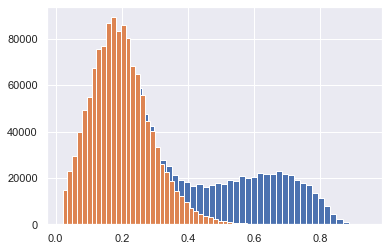

In [24]:
nnt3 = plt.hist(NNt3, bins = 50)
nnd3 = plt.hist(NNd3, bins = 50)

0.018400000000000003
0.014659999999999996


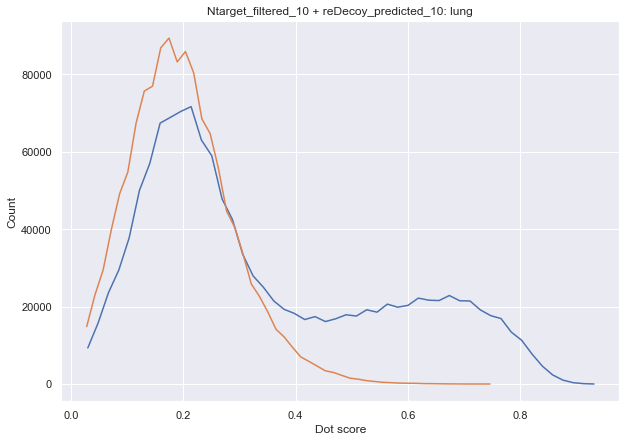

In [28]:
print(nnt3[1][1] - nnt3[1][0])
print(nnd3[1][1] - nnd3[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('Ntarget_filtered_10 + reDecoy_predicted_10: lung')
plt.plot(nnt3[1][:-1] + 0.009, nnt3[0])
plt.plot(nnd3[1][:-1] + 0.007, nnd3[0])
plt.show()

In [26]:
print(len(NNt3))
print(len(NNd3))

1284751
1298320


In [27]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ', score)
    
    nnt = 0
    nnd = 0
    
    for j in NNt3:
        if j >= score:
            nnt += 1
    print('nnt: ', nnt)
    
    for k in NNd3:
        if k >= score:
            nnd += 1
    print('nnd: ', nnd)
    
    print('FDR: ', nnd / nnt)
    print("\n")
    
    if (nnd / nnt) <= 0.01:
        print(nnt)
        print(nnd)
        print(nnd / nnt)
        print(score)
        break
"""
결과
score:  0.5190000000000003
nnt:  322103
nnd:  3218
FDR:  0.009990593071160467
"""

score:  0.001
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.002
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.003
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.004
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.005
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.006
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.007
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.008
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.009000000000000001
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.010000000000000002
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.011000000000000003
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.012000000000000004
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.013000000000000005
nnt:  1284751
nnd:  1298320
FDR:  1.0105615796368324


score:  0.014000000000000005

nnt:  1193075
nnd:  1115861
FDR:  0.9352815204408775


score:  0.10200000000000008
nnt:  1191005
nnd:  1111907
FDR:  0.9335871805743888


score:  0.10300000000000008
nnt:  1188906
nnd:  1107927
FDR:  0.9318878027362971


score:  0.10400000000000008
nnt:  1186828
nnd:  1103851
FDR:  0.9300850670863848


score:  0.10500000000000008
nnt:  1184667
nnd:  1099832
FDR:  0.9283891591476761


score:  0.10600000000000008
nnt:  1182532
nnd:  1095693
FDR:  0.9265652007725795


score:  0.10700000000000008
nnt:  1180453
nnd:  1091565
FDR:  0.9247000939469847


score:  0.10800000000000008
nnt:  1178206
nnd:  1087356
FDR:  0.922891243127263


score:  0.10900000000000008
nnt:  1175919
nnd:  1083165
FDR:  0.9211221181050736


score:  0.11000000000000008
nnt:  1173621
nnd:  1078956
FDR:  0.9193393778741178


score:  0.11100000000000008
nnt:  1171345
nnd:  1074737
FDR:  0.9175238721299019


score:  0.11200000000000009
nnt:  1168989
nnd:  1070379
FDR:  0.9156450573957496


score:  0.11300000000000009
nnt: 

nnt:  863372
nnd:  573462
FDR:  0.6642119503528028


score:  0.20300000000000015
nnt:  859495
nnd:  567729
FDR:  0.6605378739841419


score:  0.20400000000000015
nnt:  855536
nnd:  562050
FDR:  0.6569565745918349


score:  0.20500000000000015
nnt:  851733
nnd:  556371
FDR:  0.6532223126261398


score:  0.20600000000000016
nnt:  847834
nnd:  550715
FDR:  0.6495552195358997


score:  0.20700000000000016
nnt:  844040
nnd:  545087
FDR:  0.6458070707549405


score:  0.20800000000000016
nnt:  840200
nnd:  539532
FDR:  0.6421471078314687


score:  0.20900000000000016
nnt:  836422
nnd:  533826
FDR:  0.6382256803383938


score:  0.21000000000000016
nnt:  832651
nnd:  528133
FDR:  0.6342789476022967


score:  0.21100000000000016
nnt:  828838
nnd:  522490
FDR:  0.630388568091714


score:  0.21200000000000016
nnt:  825064
nnd:  516919
FDR:  0.6265198820939951


score:  0.21300000000000016
nnt:  821260
nnd:  511481
FDR:  0.6228003311984025


score:  0.21400000000000016
nnt:  817487
nnd:  505947
FDR

nnt:  558170
nnd:  156453
FDR:  0.28029632549223354


score:  0.3050000000000002
nnt:  556305
nnd:  154191
FDR:  0.2771698978078572


score:  0.3060000000000002
nnt:  554492
nnd:  151898
FDR:  0.2739408323294114


score:  0.3070000000000002
nnt:  552520
nnd:  149659
FDR:  0.27086621298776514


score:  0.3080000000000002
nnt:  550738
nnd:  147465
FDR:  0.26775889806042075


score:  0.3090000000000002
nnt:  548936
nnd:  145194
FDR:  0.2645007796901642


score:  0.3100000000000002
nnt:  547146
nnd:  143004
FDR:  0.26136351175006306


score:  0.3110000000000002
nnt:  545286
nnd:  140897
FDR:  0.25839100948859867


score:  0.3120000000000002
nnt:  543502
nnd:  138822
FDR:  0.25542132319660277


score:  0.3130000000000002
nnt:  541747
nnd:  136904
FDR:  0.25270836755902665


score:  0.3140000000000002
nnt:  540101
nnd:  134863
FDR:  0.24969959322423027


score:  0.3150000000000002
nnt:  538345
nnd:  132804
FDR:  0.24668939063240117


score:  0.3160000000000002
nnt:  536663
nnd:  130871
FDR: 

nnt:  427427
nnd:  29874
FDR:  0.06989263663736732


score:  0.4070000000000003
nnt:  426518
nnd:  29324
FDR:  0.06875208080315486


score:  0.4080000000000003
nnt:  425541
nnd:  28791
FDR:  0.06765740551439227


score:  0.4090000000000003
nnt:  424581
nnd:  28265
FDR:  0.06657151403383571


score:  0.4100000000000003
nnt:  423661
nnd:  27795
FDR:  0.06560669969621938


score:  0.4110000000000003
nnt:  422756
nnd:  27280
FDR:  0.06452894814029843


score:  0.4120000000000003
nnt:  421814
nnd:  26848
FDR:  0.06364890686416287


score:  0.4130000000000003
nnt:  420873
nnd:  26377
FDR:  0.06267211248999104


score:  0.4140000000000003
nnt:  419958
nnd:  25929
FDR:  0.06174188847456174


score:  0.4150000000000003
nnt:  419019
nnd:  25485
FDR:  0.060820631045370256


score:  0.4160000000000003
nnt:  418048
nnd:  25038
FDR:  0.05989264390691978


score:  0.4170000000000003
nnt:  417176
nnd:  24600
FDR:  0.05896791761750436


score:  0.4180000000000003
nnt:  416206
nnd:  24199
FDR:  0.058141

nnt:  333030
nnd:  4097
FDR:  0.012302194997447677


score:  0.5090000000000003
nnt:  332040
nnd:  4026
FDR:  0.012125045175280087


score:  0.5100000000000003
nnt:  331026
nnd:  3932
FDR:  0.011878221046080972


score:  0.5110000000000003
nnt:  330085
nnd:  3838
FDR:  0.011627308117606072


score:  0.5120000000000003
nnt:  329043
nnd:  3761
FDR:  0.011430117036375184


score:  0.5130000000000003
nnt:  328087
nnd:  3687
FDR:  0.011237872881278442


score:  0.5140000000000003
nnt:  327131
nnd:  3599
FDR:  0.011001708795558965


score:  0.5150000000000003
nnt:  326148
nnd:  3504
FDR:  0.010743588800176607


score:  0.5160000000000003
nnt:  325136
nnd:  3425
FDR:  0.010534053442251858


score:  0.5170000000000003
nnt:  324105
nnd:  3356
FDR:  0.010354669011585752


score:  0.5180000000000003
nnt:  323154
nnd:  3284
FDR:  0.010162337461396114


score:  0.5190000000000003
nnt:  322103
nnd:  3218
FDR:  0.009990593071160467


322103
3218
0.009990593071160467
0.5190000000000003


'\n결과\nscore:  0.5080000000000003\nnnt:  332184\nnnd:  3303\nFDR:  0.009943284444765551\n'